In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd

# Load the training dataset
train_df = pd.read_csv("/kaggle/input/Patient-Recovery-Prediction-Challenge/train.csv")

# View the first few rows
train_df.head()


,Id,Therapy Hours,Initial Health Score,Lifestyle Activities,Average Sleep Hours,Follow-Up Sessions,Recovery Index
0,9255,5,49,No,7,5,36
1,1562,2,48,Yes,7,6,25
2,1671,2,81,No,7,2,59
3,6088,2,46,No,6,1,22
4,6670,8,47,No,9,0,40


In [2]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
# Remove the ID column
train_df = train_df.drop(columns=['Id'])

# Separate features (X) and target (y)
X = train_df.drop(columns=['Recovery Index'])
y = train_df['Recovery Index']


In [5]:
X = pd.get_dummies(X, drop_first=True)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [7]:
gbr = GradientBoostingRegressor(
    n_estimators=200,      # number of boosting stages
    learning_rate=0.05,    # step size shrinkage
    max_depth=4,           # depth of individual trees
    random_state=42
)

gbr.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=200,
                          random_state=42)

In [8]:
y_pred = gbr.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 4.3575
R² Score: 0.9884


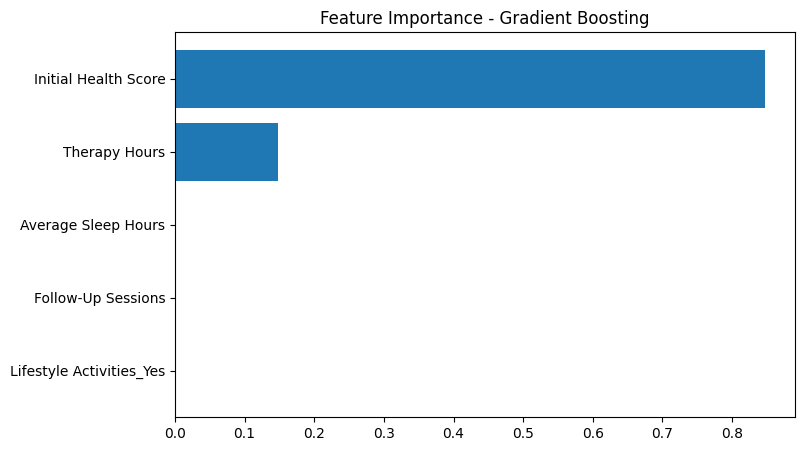

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gbr.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
plt.barh(importance['Feature'], importance['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Gradient Boosting')
plt.show()


In [11]:
# Load test data
test_df = pd.read_csv("/kaggle/input/Patient-Recovery-Prediction-Challenge/test.csv")

# Keep the ID for submission
test_ids = test_df['Id'] if 'Id' in test_df.columns else test_df['ID']

# Drop ID column from features
test_features = test_df.drop(columns=['Id', 'ID'], errors='ignore')

# Convert categorical columns to dummy variables
test_features = pd.get_dummies(test_features, drop_first=True)

# Match training feature columns
test_features = test_features.reindex(columns=X.columns, fill_value=0)


In [12]:
test_predictions = gbr.predict(test_features)

submission = pd.DataFrame({
    'Id': test_ids,
    'Recovery Index': test_predictions
})
submission.to_csv("/kaggle/working/submission.csv", index=False)
print("✅ Gradient Boosting submission file created successfully!")


✅ Gradient Boosting submission file created successfully!
